In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
from sys import version

print(f"Python: {version}")
print(f"  >      numpy: {np.__version__}")
print(f"  > matplotlib: {mpl.__version__}")

import cbgt

Python: 3.12.9 (main, Feb  4 2025, 14:38:38) [GCC 14.2.1 20241116]
  >      numpy: 2.2.3
  > matplotlib: 3.10.1


In [2]:
%%time
rt = cbgt.RubinTerman(dt=0.01, total_t=2, i_ext_stn=lambda t, n: 50. if 500 < t < 1000 else 0.)
data = rt.run()

Simulation completed!
CPU times: user 937 ms, sys: 102 ms, total: 1.04 s
Wall time: 1.04 s


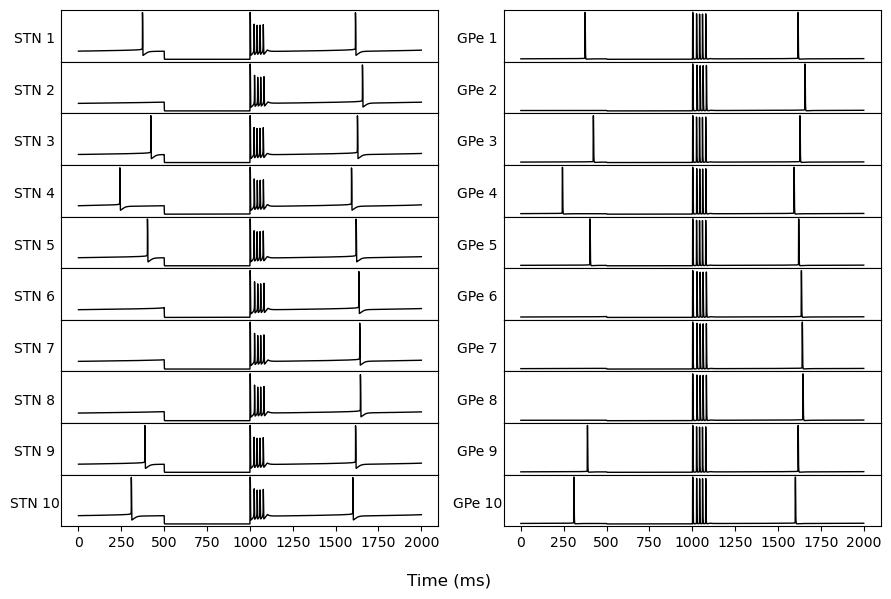

In [3]:
N_stn = rt.num_stn
fig, axs = plt.subplots(N_stn, 2, figsize=(9, (N_stn)*0.6), 
                            sharex=True, tight_layout=True, gridspec_kw={'hspace': 0})

for i, (trace, ax) in enumerate(zip(data["stn"]["v"].T, axs[:,0])):
    ax.plot(trace, 'k', lw=1)
    ax.set_yticks([])
    ax.set_ylabel(f"STN {i+1}", rotation=0, labelpad=10)
    ax.yaxis.set_label_coords(-0.07, 0.3)
    
for i, (trace, ax) in enumerate(zip(data["stn"]["s"].T, axs[:, 1])):
    ax.plot(trace, 'k', lw=1)
    ax.set_yticks([])
    ax.set_ylabel(f"GPe {i+1}", rotation=0, labelpad=10)
    ax.yaxis.set_label_coords(-0.07, 0.3)

axs[-1,0].xaxis.set_major_formatter(lambda x, _: f"{x*rt.dt:.0f}")

fig.supxlabel("Time (ms)")
    
plt.show()